#### Breast Cancer Data

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("../data/breast_cancer.txt", delim_whitespace=True)
df.head()

C:\Users\ryans\AppData\Local\Temp\ipykernel_29908\1437134383.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/breast_cancer.txt", delim_whitespace=True)


,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [27]:
# use only mitoses and clump_thickeness
df = df[['mitoses', 'clump_thickness', 'class']]

In [28]:
df.head()

,mitoses,clump_thickness,class
0,1,5,0
1,1,5,0
2,1,3,0
3,1,6,0
4,1,4,0


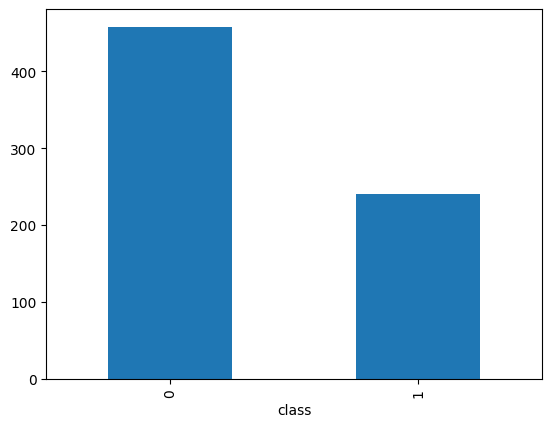

In [29]:
import matplotlib.pyplot as plt
graph = df['class'].value_counts()
graph.plot(kind = 'bar')
plt.show()

Categorize the values for mitoses as follows:
+ low = 1
+ high = 2-10

In [30]:
def categorize_mitoses(mitoses):
    if mitoses == 1:
        return 'low'
    else:
        return 'high'

In [31]:
df['mitoses'] = df['mitoses'].apply(categorize_mitoses)

Find the prior probabilities for each predictor variable and target variable. Then, find the compliments.

In [32]:
def categorize_thickness(clump_thickness):
    '''Low = 1-5 and High = 6-10'''
    if clump_thickness <= 5:
        return 'low'
    else:
        return 'high'

In [33]:
df['clump_thickness'] = df['clump_thickness'].apply(categorize_thickness)

In [34]:
df

,mitoses,clump_thickness,class
0,low,low,0
1,low,low,0
2,low,low,0
3,low,high,0
4,low,low,0
...,...,...,...
694,low,low,0
695,low,low,0
696,high,low,1
697,low,low,1


##### Prior Probabilities

First, we will establish the prior probabilities for low mitoses, low clump thickness, and malignant tumors.
+ p(Low Mitoses)
+ p(Low Clump Thickness)
+ p(Cancer - class = 0)

In [ ]:
# function to calculate priors
def prior(col, outcome) -> float:
    '''Find the prior probabilities'''
    prior = df[col].value_counts(normalize = True)
    prior_probability = round(prior[outcome], 4)
    return prior_probability

    

In [ ]:
# low mitosis prior
low_mitoses_prior = prior('mitoses', 'low')
low_mitoses_prior

np.float64(0.8283)

In [ ]:
# low clump thickness prior
low_clump_prior = prior('clump_thickness', 'low')
low_clump_prior

np.float64(0.7339)

In [ ]:
# breast cancer prior
breast_cancer_prior = prior('class', 1)
breast_cancer_prior

np.float64(0.3448)

Complements can be found using the same function or subtracting the value from 1.

In [75]:
# complements of priors
high_mitoses_prior = 1 - low_mitoses_prior
high_clump_thickness_prior = 1 - low_clump_prior
no_cancer_prior = 1 - breast_cancer_prior

##### Conditional Probabilities Given No Cancer (class = 1)

+ p(LM | 1)
+ p(LC | 1)

This can easily be done by subsetting the dataset into only those who are malignant and those who are benign.

In [76]:
# separate the classes
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]

Given Malignant

In [96]:
# now get probability of high mitoses and high clump thickness. 
given_malignant_mitoses = class_1['mitoses'].value_counts(normalize=True)
low_mitoses_given_malignant = round(given_malignant_mitoses['low'], 4)

given_malignant_clump = class_1['clump_thickness'].value_counts(normalize=True)
low_clump_given_malignant = round(given_malignant_clump['low'], 4)

In [106]:
low_mitoses_given_malignant

np.float64(0.556)

In [98]:
low_clump_given_malignant

np.float64(0.3154)

In [107]:
high_mitoses_given_malignant = round(1 - low_mitoses_given_malignant, 4)
high_mitoses_given_malignant

np.float64(0.444)

In [108]:
high_clump_given_malignant = round(1 - low_clump_given_malignant, 4)
high_clump_given_malignant

np.float64(0.6846)

Given Benign

When we calculate these conditional probabilities we can start to get a sense of the data. From the following conditional probabilities we see that benign tumors are very likely to have low mitoses and low clump thickness.

In [110]:
mitoses_given_benign = class_0['mitoses'].value_counts(normalize=True)
mitoses_given_benign

mitoses
low     0.971616
high    0.028384
Name: proportion, dtype: float64

In [111]:
clump_given_benign = class_0['clump_thickness'].value_counts(normalize=True)
clump_given_benign

clump_thickness
low     0.954148
high    0.045852
Name: proportion, dtype: float64

In [112]:
low_mitoses_given_benign = mitoses_given_benign['low']
high_mitoses_given_benign = mitoses_given_benign['high']

p(Class = 1 | Mitoses Low)

First, construct the dataframe for all values where mitoses is low.

In [116]:
# low mitoses
low_mitoses = df[df['mitoses'] == 'low']

In [123]:
# out of those with low mitoses, what is the probability of class = 1?
class_given_low_mitoses = low_mitoses['class'].value_counts(normalize='True')
class_given_low_mitoses

class
0    0.768566
1    0.231434
Name: proportion, dtype: float64

In [121]:
malignant_given_low_mitoses = class_given_low_mitoses[1]
malignant_given_low_mitoses

np.float64(0.231433506044905)

In [122]:
# same for high mitoses
high_mitoses = df[df['mitoses'] == 'high']
class_given_high_mitoses = high_mitoses['class'].value_counts(normalize=True)
class_given_high_mitoses

class
1    0.891667
0    0.108333
Name: proportion, dtype: float64

In [126]:
malignant_given_high_mitoses = class_given_high_mitoses[0]
malignant_given_high_mitoses

np.float64(0.10833333333333334)